In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Exercise 1

In [3]:


v = np.array([0.00152, 0.00240, 0.00492, 0.00817, 0.01260, 0.01770, 0.02381, 0.02635, 0.03356]) # in m/s #Lorena und meine
d_v = np.array([0.3e-4, 0.5e-4, 1.4e-4, 1.9e-4, 2e-4, 1.2e-4, 1.6e-4, 1.4e-4,2.4e-3]) #in m/s #L&R
rho_f = np.array([1146.6, 1146.6, 1146.6, 1146.6, 1146.6, 1146.6, 1146.6, 1146.6, 1146.6]) #in kg/m^3 #L&R
d_rho_f = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]) #in kg/m^3
rho_k = np.array([1392.5, 1377.5, 1377.5, 1377.5, 1377.5, 1377.5 ,1377.5, 1357.5, 1362.5]) #in kg/m^3 #sollten gleich sein, nochmal checken
d_rho_k = np.array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]) #in kg/m^3
radius = (np.array([1.5, 2, 3, 4, 5, 6, 7.144, 8, 9])/2) #in mm
r_pipe = 37.5
ladenburg_corr = (1+2.1*(radius/r_pipe))
corr_v = v*ladenburg_corr
corr_d_v = d_v * ladenburg_corr

In [4]:
y = v / (rho_k - rho_f)
d_y = np.sqrt((d_v/(rho_k - rho_f))**2+(v*d_rho_k/(rho_k-rho_f)**2)**2+(v*d_rho_f/(rho_k-rho_f)**2)**2)
r_sq = radius**2

corr_y = corr_v / (rho_k - rho_f)
corr_d_y =np.sqrt((corr_d_v/(rho_k - rho_f))**2+(corr_v*d_rho_k/(rho_k-rho_f)**2)**2+(corr_v*d_rho_f/(rho_k-rho_f)**2)**2)


[1.37258644e-07 2.44083174e-07 6.48797115e-07 9.07806141e-07
 1.04876090e-06 9.79824345e-07 1.31479740e-06 1.62408596e-06
 1.12612668e-05]


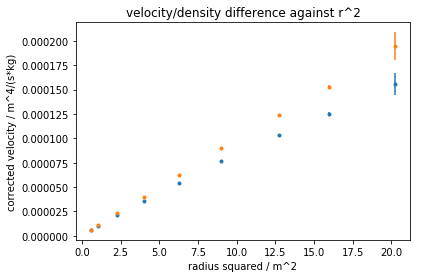

In [5]:
plt.errorbar(r_sq, y, yerr = d_y, fmt='.')
plt.errorbar(r_sq, corr_y, yerr = corr_d_y, fmt = '.')
plt.title('velocity/density difference against r^2')
plt.ylabel('corrected velocity / m^4/(s*kg)')
plt.xlabel('radius squared / m^2')
plt.savefig('diagramm 1.pdf', format = 'pdf')
print (d_y)

In [6]:
def line(x, m):
    return m*x

In [7]:
radius_ = radius/1000
r_sq_ = (radius_)**2
popt, pcov = curve_fit(line, r_sq_[:5], corr_y[:5],sigma = corr_d_y[:5])
print('m = ', popt[0], ' +- ', pcov[0][0])

m =  10.429818916628163  +-  0.09732506380932597


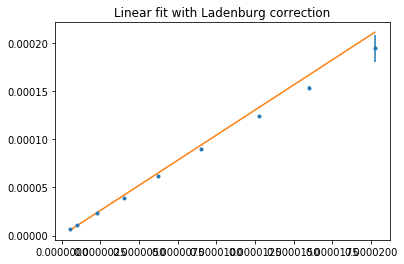

In [8]:
plt.errorbar(r_sq_, corr_y, yerr = corr_d_y, fmt = '.')
plt.title('Linear fit with Ladenburg correction')
plt.plot(r_sq_, line(r_sq_, popt[0]))
plt.savefig("C:/Users/lorena/Desktop/DiagrammREB1.pdf", format="pdf")

In [9]:


visc = 0.209
d_visc = 0.002
g = 9.81
d_g =2e-5


v_theo = 2*g*(rho_k-rho_f)*r_sq_/(9*visc)
d_v_theo= (2/9)*r_sq_*np.sqrt((g*d_rho_k/visc)**2+(g*d_rho_f/visc)**2+(g*(rho_k-rho_f)*d_visc/visc)**2+(g*(rho_k-rho_f)*d_g/visc)**2)
Reynolds = 2*rho_f*v*radius/visc
d_Reynolds = 2*radius*np.sqrt((corr_v*d_rho_f/visc)**2+(rho_f*corr_d_v/visc)**2+(rho_f*corr_v*d_visc/visc**2)**2)
difference = (v_theo-v)/np.sqrt(d_v**2+d_v_theo**2)

print('Radius, v_theo, delta_v_theo, Abweichung in sigma, Reynolds-Zahl, delta_Reynolds-Zahl')
for i in range(len(v_theo)):
    print(radius_[i], v_theo[i], d_v_theo[i], difference[i], Reynolds[i], d_Reynolds[i])

Radius, v_theo, delta_v_theo, Abweichung in sigma, Reynolds-Zahl, delta_Reynolds-Zahl
0.00075 0.001442750598086125 1.4960723303835892e-05 -2.3043376776927835 12.508363636363637 0.28588839031472374
0.001 0.00240843062200957 2.6538258668008537e-05 0.14893420257734277 26.3333971291866 0.637531939118561
0.0015 0.0054189688995215325 5.9711082003019214e-05 3.2783359071378313 80.9751961722488 2.635190877756291
0.002 0.00963372248803828 0.00010615303467203415 6.725337466084062 179.28654545454543 5.013638850707978
0.0025 0.015052691387559816 0.00016586411667505338 9.439651055059752 345.6258373205742 7.302901302600883
0.003 0.02167587559808613 0.00023884432801207686 14.874485902928004 582.6264114832535 7.980947891984776
0.003572 0.03072960945745456 0.0003386065253847159 18.476655811563084 933.1822996363636 13.094914082442498
0.004 0.03519709090909093 0.0004234512483623732 19.83677802204992 1156.475023923445 15.493994930276095
0.0045 0.0456024186602871 0.0005362856968321232 4.896909840455403 1657

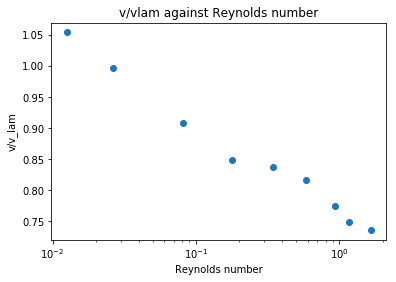

In [10]:
plt.plot(Reynolds/1000, v/v_theo, 'o')
plt.xscale('log')
plt.title('v/vlam against Reynolds number')
plt.ylabel('v/v_lam')
plt.xlabel('Reynolds number')
plt.savefig('Diagram_2.pdf', format='pdf')

plt.savefig("C:/Users/lorena/Desktop/REBBECCAISTDOOF.pdf", format="pdf")

# Exercise 2

In [12]:
# hier nochmal Werte eintragen
Output = np.array([0, 5, 10, 15, 20, 25])
time = np.array([0,102.43, 302.98, 505.26, 707.57, 915.61])
d_time = np.array([1 ,1, 1, 1, 1, 1])

In [13]:
def line(x, m ):
    return m*x

In [14]:
popt, pcov = curve_fit(line, Output, time)

m =  35.027272727346954  +-  1.3923501375352714


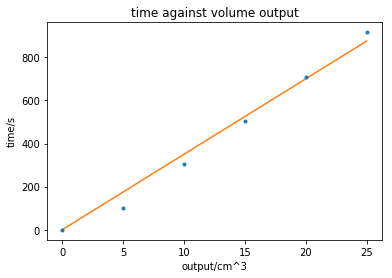

In [15]:
plt.errorbar(Output, time, yerr=d_time, fmt = '.')
plt.plot(Output, line(Output, popt[0]))
print('m = ', popt[0], ' +- ', pcov[0][0])
plt.title('time against volume output')
plt.ylabel('time/s')
plt.xlabel('output/cm^3')
plt.savefig('Diagramm3.pdf', format='pdf')
plt.savefig("C:/Users/lorena/Desktop/BADEWAANE.pdf", format="pdf")